In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

filepath_list = [
    "data/results/destination_pred/results_22_07_2021__15_26__2_12.csv",
    "data/results/destination_pred/results_22_07_2021__14_07__6_8.csv",
    "data/results/destination_pred/results_22_07_2021__08_54__3_10.csv",
    "data/results/destination_pred/results_20_07_2021__16_17__3_7.csv",
    "data/results/destination_pred/results_30_07_2021__01_25__3_11.csv", # lstm layer size
    "data/results/destination_pred/results_31_07_2021__00_22__3_11.csv", # lstm and dense layer size
    "data/results/destination_pred/results_31_07_2021__10_37__3_11.csv", # num lstm and dense layers
    "data/results/destination_pred/results_31_07_2021__15_05__3_11.csv" # num input/ output points
    ]

def load_input_list(filepath_list):
    kpi_dataframe = None
    for filepath in filepath_list:
        try:
            new_frame = pd.read_csv(filepath)
            kpi_dataframe = pd.DataFrame.append(kpi_dataframe, new_frame)
        except:
            kpi_dataframe = pd.read_csv(filepath)
    return kpi_dataframe

kpi_dataframe = load_input_list(filepath_list=filepath_list)

# Different plots to be created
1. KPI vs input length // varying n -- maybe also plot number of training samples on second axis
2. KPI vs output length // varying n -- maybe also plot number of training samples on second axis
3. KPI vs features // varying n
4. KPI vs num dense units
5. KPI vs n // best fixed vs variable length network

kpi_dataframe.head()

In [2]:
# Function to create a dict containing all the inputs for plotting

def return_input_dict(num_in_steps, num_out_steps, n, 
dests_incl, all_points_incl, n_conn_points_incl, num_lstm_lay,
num_dense_lay, lstm_lay_size, dense_lay_size, var_in_len):
    ''' For mapping the fixed values against the column titles 
    Set value to None if it is not to be fixed'''
    out_dict = dict()
    out_dict["num_in_steps"] = num_in_steps
    out_dict["num_out_steps"] = num_out_steps
    out_dict["n"] = n
    out_dict["dests_included"] = dests_incl
    out_dict["all_points_included"] = all_points_incl
    out_dict["n_conn_points_included"] = n_conn_points_incl
    out_dict["num_lstm_layers"] = num_lstm_lay
    out_dict["num_dense_layers"] = num_dense_lay
    out_dict["lstm_layer_size"] = lstm_lay_size
    out_dict["dense_layer_size"] = dense_lay_size
    out_dict["var_in_len"] = var_in_len

    return out_dict

In [3]:
df_c=kpi_dataframe.copy()

In [4]:
df_c[df_c["n"].isin([5,9])]

,n,ADE,FDE,counter,not_counter,num_in_steps,num_out_steps,dests_included,all_points_included,n_conn_points_included,num_lstm_layers,num_dense_layers,lstm_layer_size,dense_layer_size,var_in_len
1,5,3.033989,4.611729,1867,0,2,12,False,False,False,2,2,64,64,False
2,9,4.254160,7.024034,1867,0,2,12,False,False,False,2,2,64,64,False
4,5,2.703064,4.415110,1867,0,2,12,False,True,False,2,2,64,64,False
5,9,4.118744,7.172764,1867,0,2,12,False,True,False,2,2,64,64,False
7,5,2.887719,4.388324,1867,0,2,12,False,False,True,2,2,64,64,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,9,8.820626,22.924233,2087,0,7,5,True,False,False,2,2,32,32,False
35,5,4.298243,11.669263,2087,0,8,4,True,False,False,2,2,32,32,False
37,9,11.139490,26.940094,2087,0,8,4,True,False,False,2,2,32,32,False
40,5,6.192786,15.213576,2087,0,9,3,True,False,False,2,2,32,32,False


<ipython-input-5-493d907b0e9a>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-5-493d907b0e9a>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-5-493d907b0e9a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

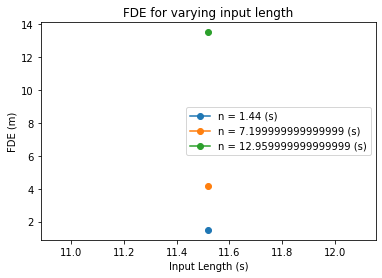

In [5]:
# 1. KPI vs input length

def plot_graph1(df, time_per_step = 1.44, KPI="FDE", num_in_steps=[2,3,7], n=[1,2,3,5,9], num_out_steps = 8, 
dests_incl=False, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=64, dense_lay_size=64, var_in_len=False, save_path=None):
    # Easy access to vars that change per function made 
    x_col_name = "num_out_steps"
    y_col_name = KPI
    fixed_col_name = "n"
    
    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying input length")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Input Length" + " (s)")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=None, num_out_steps=num_out_steps, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]
    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [x*time_per_step for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')
        
plot_graph1(kpi_dataframe)

<ipython-input-6-e86c45c83e6a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-6-e86c45c83e6a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-6-e86c45c83e6a>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

False

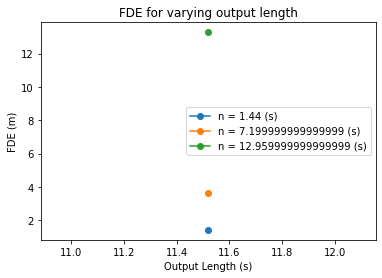

In [6]:
# 2. KPI vs output length

def plot_graph2(df, time_per_step = 1.44, KPI="FDE", num_out_steps = [7,10],  n=[1,2,3,5,9], num_in_steps=3,
dests_incl=True, all_points_incl=True, n_conn_points_incl=True, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=32, dense_lay_size=32, var_in_len=False, save_path=None):
    # Easy access to vars that change per function made 
    x_col_name = "num_out_steps"
    y_col_name = KPI
    fixed_col_name = "n"

    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying output length")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Output Length" + " (s)")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=num_in_steps, num_out_steps=None, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]


    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [x*time_per_step for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')

    return False

plot_graph2(kpi_dataframe)

False

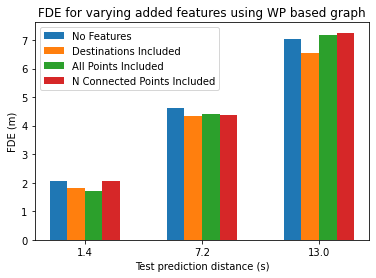

In [10]:
# 3. KPI vs features // fixed n

def plot_graph3(df, time_per_step = 1.44, KPI="FDE", num_out_steps = 12,  n=[1,5,9], num_in_steps=2,
dests_incl=True, all_points_incl=True, n_conn_points_incl=True, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=64, dense_lay_size=64, var_in_len=False, save_path="features.png", graph="WP"):
    # Easy access to vars that change per function made 
    x_col_name = None
    y_col_name = KPI
    fixed_col_name = "n"

    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying added features using " + graph + " based graph")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Test prediction distance" + " (s)")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=num_in_steps, num_out_steps=num_out_steps, n=n, 
    dests_incl=None, all_points_incl=None, n_conn_points_incl=None, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]


    # Plot the values
    def return_filtered_by_feat(df, dests_incl, all_points_incl, n_conn_points_incl):
        df_c = df.copy()
        df_c=df_c[df_c["dests_included"]==dests_incl]
        df_c=df_c[df_c["all_points_included"]==all_points_incl]
        df_c=df_c[df_c["n_conn_points_included"]==n_conn_points_incl]

        return df_c
    
    adj_val = 0.9

    legend_list = n
    lst_no_features = []
    lst_dests_incl = []
    lst_all_points_incl = []
    lst_n_conn_points_incl = []

    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        # no features included
        df_local = return_filtered_by_feat(fix_df, False, False, False)
        if len(df_local) > 0:
            val = df_local.iloc[0][KPI]
            lst_no_features.append(val)
        else:
            lst_no_features.append(0.)

        # destinations included
        df_local = return_filtered_by_feat(fix_df, True, False, False)
        if len(df_local) > 0:
            val = df_local.iloc[0][KPI]
            lst_dests_incl.append(val)
        else:
            lst_dests_incl.append(0.)

        # lst_all_points_incl included
        df_local = return_filtered_by_feat(fix_df, False, True, False)
        if len(df_local) > 0:
            val = df_local.iloc[0][KPI]
            lst_all_points_incl.append(val)
        else:
            lst_all_points_incl.append(0.)

        # lst_n_conn_points_incl included
        df_local = return_filtered_by_feat(fix_df, False, False, True)
        if len(df_local) > 0:
            val = df_local.iloc[0][KPI]
            lst_n_conn_points_incl.append(val)
        else:
            lst_n_conn_points_incl.append(0.)

    # prints for debug

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [round(x*time_per_step, 1) for x in legend_list]

    # Make the plot    
    x = np.arange(len(legend_list))  # the label locations
    width = 0.45  # the width of the bars
    rects1 = ax.bar(x - 1.5*width/3, lst_no_features, width/3, label='No Features')
    rects2 = ax.bar(x - .5*width/3, lst_dests_incl, width/3, label='Destinations Included')
    rects3 = ax.bar(x + .5*width/3, lst_all_points_incl, width/3, label='All Points Included')
    rects4 = ax.bar(x + 1.5*width/3, lst_n_conn_points_incl, width/3, label='N Connected Points Included')

    # Set title and labels
    ax.set_xticks(x)
    ax.set_xticklabels(legend_list)
    ax.legend()

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')

    return False

plot_graph3(kpi_dataframe)

False

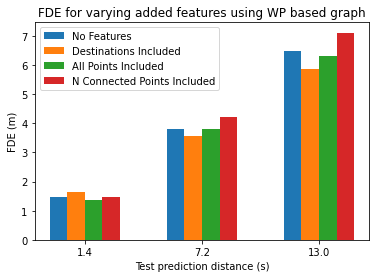

In [13]:
graph1_frame = load_input_list(["data/results/destination_pred/results_14_08_2021__01_16__3_11.csv"])
plot_graph3(graph1_frame, num_out_steps = 11, num_in_steps=3, lstm_lay_size=32, dense_lay_size=32,
save_path="wp_graph_results.png", graph="WP")

False

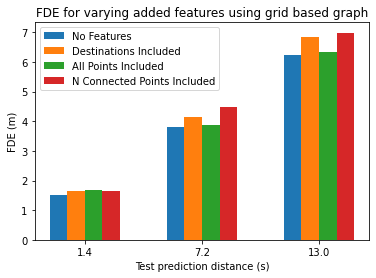

In [12]:
graph1_frame = load_input_list(["data/results/destination_pred/results_13_08_2021__23_27__3_11.csv"])
plot_graph3(graph1_frame, num_out_steps = 11, num_in_steps=3, lstm_lay_size=32, dense_lay_size=32,
save_path="grid_graph_results.png", graph="grid")

<ipython-input-12-e86ccad4e00e>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-12-e86ccad4e00e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-12-e86ccad4e00e>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

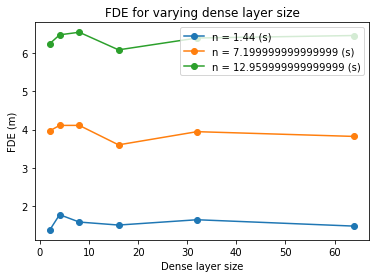

In [12]:
# 4. KPI vs num dense units // fixed n

def plot_graph4(df, time_per_step = 1.44, KPI="FDE", num_in_steps=3, n=[1,5,9], num_out_steps = 11, 
dests_incl=False, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=32, dense_lay_size=[2, 4, 8, 16, 32, 64], var_in_len=False, save_path="dense_units.png"):
    # Easy access to vars that change per function made 
    x_col_name = "dense_layer_size"
    y_col_name = KPI
    fixed_col_name = "n"
    
    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying dense layer size")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Dense layer size")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=num_in_steps, num_out_steps=num_out_steps, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=None, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]
    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [x*time_per_step for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')
      
plot_graph4(kpi_dataframe)

<ipython-input-13-df0a4b08fcd9>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-13-df0a4b08fcd9>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-13-df0a4b08fcd9>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

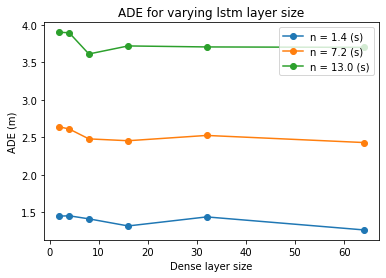

In [13]:
# 4. KPI vs num lstm units // fixed n

def plot_graph4(df, time_per_step = 1.44, KPI="FDE", num_in_steps=3, n=[1,5,9], num_out_steps = 11, 
dests_incl=False, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=[2, 4, 8, 16, 32, 64], dense_lay_size=32, var_in_len=False, save_path=None):
    # Easy access to vars that change per function made 
    x_col_name = "lstm_layer_size"
    y_col_name = KPI
    fixed_col_name = "n"
    
    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying lstm layer size")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Dense layer size")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=num_in_steps, num_out_steps=num_out_steps, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=None, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]
    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [round(x*time_per_step, 1) for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')
      
plot_graph4(kpi_dataframe, save_path="lstm_units.png")

<ipython-input-3-0e249e769025>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["num_lstm_layers"]==num_lstm]
<ipython-input-3-0e249e769025>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-3-0e249e769025>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["num_lstm_layers"]==num_lstm]
<ipython-input-3-0e249e769025>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-3-0e249e769025>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["num_lstm_layers"]==num_lstm]
<ipython-input-3-0e249e769025>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-3-0e249e769025>:22: UserWarning: Boolean Series key 

[[4.25997725 4.09791611 4.59939818 4.20517358]
 [4.33416485 4.16169133 4.44942987 4.35150862]
 [4.7541754  4.44165029 5.22693809 4.76087403]
 [4.83368847 4.53141183 4.46821284 4.77397721]]


<ipython-input-3-0e249e769025>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0] + num_dense_lay)
<ipython-input-3-0e249e769025>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0] + num_lstm_lay)


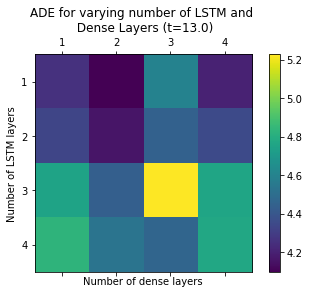

In [3]:
# 6. Number of LSTM and Dense layers


def plot_graph6(df, time_per_step = 1.44, KPI="ADE", num_in_steps=3, n=9, num_out_steps = 11, 
dests_incl=False, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=[1,2,3,4],
num_dense_lay=[1,2,3,4], lstm_lay_size=[], dense_lay_size=[], var_in_len=False, save_path="num_layers_n9.png"):
    # Easy access to vars that change per function made 
    x_col_name = "Number dense layers"
    y_col_name = "Number LSTM layers"
    fixed_col_name = KPI
    
    # copy the df
    df_c = df.copy()

    # create a matrix out of the copy df
    plot_mat = np.zeros((len(num_lstm_lay), len(num_dense_lay)))

    for ind_dense, num_dense in zip(range(len(num_dense_lay)),num_dense_lay):
        for ind_lstm, num_lstm in zip(range(len(num_lstm_lay)),num_lstm_lay):
            # get value
            filt_df = df_c[df_c["num_dense_layers"]==num_dense]
            filt_df = filt_df[df_c["num_lstm_layers"]==num_lstm]
            filt_df = filt_df[df_c["n"]==n]
            
            # put value into plot mat
            plot_mat[ind_lstm, ind_dense] = filt_df[KPI]

    print(plot_mat)
    # Create the graph
    fig, ax = plt.subplots()
    cax = ax.matshow(plot_mat)
    fig.colorbar(cax)

    # Set correct axis labels
    ax.set_xticklabels([0] + num_dense_lay)
    ax.set_yticklabels([0] + num_lstm_lay)

    # Set axes labels, title...
    time = round(n*time_per_step,1)
    ax.set_title(KPI + " for varying number of LSTM and \n Dense Layers (t=" + str(time) + ")")
    ax.set_ylabel("Number of LSTM layers")
    ax.set_xlabel("Number of dense layers")

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')

df_lstm_dense = load_input_list(["data/results/destination_pred/results_26_08_2021__08_59__3_11.csv"])
plot_graph6(df_lstm_dense)

<ipython-input-16-cea2cbe12306>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["lstm_layer_size"]==num_lstm]
<ipython-input-16-cea2cbe12306>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-16-cea2cbe12306>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["lstm_layer_size"]==num_lstm]
<ipython-input-16-cea2cbe12306>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-16-cea2cbe12306>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["lstm_layer_size"]==num_lstm]
<ipython-input-16-cea2cbe12306>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-16-cea2cbe12306>:20: UserWarning: Boolean Seri

[[3.44170924 3.65551613 3.50599309 3.24447703 3.72375021 3.34225693]
 [3.3959077  3.49773338 3.63761054 3.39241558 3.40214576 3.3975584 ]
 [3.35949347 3.33491243 3.40018085 3.58899276 3.31254918 3.48617409]
 [3.4723765  3.35673693 3.30513111 3.48394272 3.34891452 3.52243922]
 [3.52648185 3.39320935 3.49226754 3.34846622 3.32084767 3.51101617]
 [3.52687703 3.33151225 3.27830746 3.60920864 3.41218753 3.36929206]]


<ipython-input-16-cea2cbe12306>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0] + dense_lay_size)
<ipython-input-16-cea2cbe12306>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0] + lstm_lay_size)


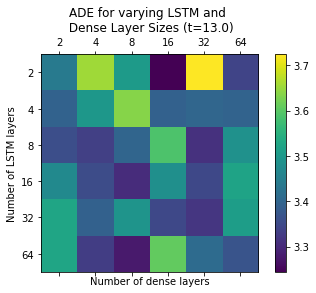

In [16]:
# 7. KPI vs units per layer

def plot_graph7(df, time_per_step = 1.44, KPI="ADE", n=9, 
lstm_lay_size=[2, 4, 8, 16, 32, 64], dense_lay_size=[2, 4, 8, 16, 32, 64], save_path="layer_sizes_n11.png"):
    # Easy access to vars that change per function made 
    x_col_name = "Number dense layers"
    y_col_name = "Number LSTM layers"
    fixed_col_name = KPI
    
    # copy the df
    df_c = df.copy()

    # create a matrix out of the copy df
    plot_mat = np.zeros((len(lstm_lay_size), len(dense_lay_size)))

    for ind_dense, num_dense in zip(range(len(dense_lay_size)),dense_lay_size):
        for ind_lstm, num_lstm in zip(range(len(lstm_lay_size)),lstm_lay_size):
            # get value
            filt_df = df_c[df_c["dense_layer_size"]==num_dense]
            filt_df = filt_df[df_c["lstm_layer_size"]==num_lstm]
            filt_df = filt_df[df_c["n"]==n]
            
            # put value into plot mat
            plot_mat[ind_lstm, ind_dense] = filt_df[KPI]

    print(plot_mat)
    # Create the graph
    fig, ax = plt.subplots()
    cax = ax.matshow(plot_mat)
    fig.colorbar(cax)

    # Set correct axis labels
    ax.set_xticklabels([0] + dense_lay_size)
    ax.set_yticklabels([0] + lstm_lay_size)

    # Set axes labels, title...
    time = round(n*time_per_step, 1)
    ax.set_title(KPI + " for varying LSTM and \n Dense Layer Sizes (t=" + str(time) + ")")
    ax.set_ylabel("Number of LSTM layers")
    ax.set_xlabel("Number of dense layers")
    
    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')

df_lstm_dense = load_input_list(["data/results/destination_pred/results_31_07_2021__00_22__3_11.csv"])
plot_graph7(df_lstm_dense)

<ipython-input-57-e0ec8405a01b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-57-e0ec8405a01b>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-57-e0ec8405a01b>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

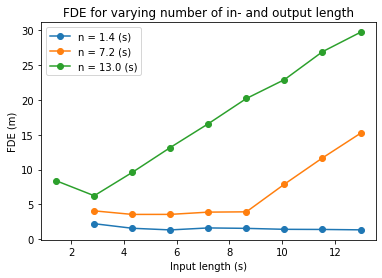

In [57]:
# 8. Changing input and output length

def plot_graph8(df, time_per_step = 1.44, KPI="FDE", num_in_steps=[1,2,3,4,5,6,7,8,9], n=[1,5,9], num_out_steps = 11, 
dests_incl=True, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=32, dense_lay_size=32, var_in_len=False, save_path="inp_outp_size.png"):
    # Easy access to vars that change per function made 
    x_col_name = "num_in_steps"
    y_col_name = KPI
    fixed_col_name = "n"
    
    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying number of in- and output length")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Input length (s)")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=None, num_out_steps=None, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]
    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [round(x*time_per_step,1) for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save if needed
    if save_path is not None:
      save_path = "data/images/path_pred_result/" + save_path
      plt.gcf()
      plt.savefig(save_path, bbox_inches='tight')

df_df_in_out_len = load_input_list(["data/results/destination_pred/results_31_07_2021__15_05__3_11.csv"])

plot_graph8(df_df_in_out_len)

3     3.0
8     3.0
13    3.0
18    3.0
23    3.0
28    3.0
33    3.0
38    3.0
Name: num_in_steps, dtype: float64
4     3.0
9     3.0
14    3.0
19    3.0
24    3.0
29    3.0
34    3.0
39    3.0
Name: num_in_steps, dtype: float64
5     3.0
10    3.0
15    3.0
20    3.0
25    3.0
30    3.0
35    3.0
40    3.0
Name: num_in_steps, dtype: float64
1     3.0
6     3.0
11    3.0
16    3.0
21    3.0
26    3.0
31    3.0
36    3.0
41    3.0
Name: num_in_steps, dtype: float64
2     3.0
7     3.0
12    3.0
17    3.0
22    3.0
27    3.0
32    3.0
37    3.0
42    NaN
Name: num_in_steps, dtype: float64


<ipython-input-17-6deef8d32d67>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-17-6deef8d32d67>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-17-6deef8d32d67>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

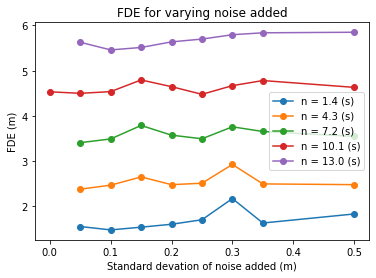

In [17]:
# 9. Changing of noise
def plot_graph9(df, time_per_step = 1.44, KPI="FDE", save_path=None, n=[1,3,5,7,9]):
    # Easy access to vars that change per function made 
    x_col_name = "noise"
    y_col_name = KPI
    fixed_col_name = "n"
    
    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying noise added")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Standard devation of noise added (m)")

    # # Create the dict that will map the fixed values 
    # input_dict = return_input_dict(num_in_steps=num_in_steps, num_out_steps=num_out_steps, n=n, 
    # dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    # num_dense_lay=num_dense_lay, lstm_lay_size=None, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # # Filter the DF to contain the needed information 
    # for key, value in input_dict.items():
    #     if value is not None:
    #         if type(value)==list:
    #             df_c = df_c[df_c[key].isin(value)]
    #         else:
    #             df_c = df_c[df_c[key]==value]
    # Plot the values
    legend_list = []
    # print(df_c)

    # dtype change of columns
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            print(fix_df["num_in_steps"])
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [round(x*time_per_step, 1) for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')
      
df_noise = load_input_list(["data/results/destination_pred/results_06_08_2021__23_56__3_11.csv"])      
plot_graph9(df_noise, save_path="noise.png")

In [4]:
df_noise

,n,ADE,FDE,counter,not_counter,num_in_steps,num_out_steps,dests_included,all_points_included,n_conn_points_included,num_lstm_layers,num_dense_layers,lstm_layer_size,dense_layer_size,var_in_len,noise
0,3.412908,1867.000000,0.000000,3,11,True,False,False,2,2,32,32,False,0,NaN,NaN
1,7.000000,2.765491,4.533574,1867,0,3,11,True,False,False,2,2,32,32,False,0.00
2,9.000000,3.274302,5.628668,1867,0,3,11,True,False,False,2,2,32,32,False,0.00
3,1.000000,1.431814,1.555713,1867,0,3,11,True,False,False,2,2,32,32,False,0.05
4,3.000000,1.787022,2.381156,1867,0,3,11,True,False,False,2,2,32,32,False,0.05
5,5.000000,2.240511,3.409178,1867,0,3,11,True,False,False,2,2,32,32,False,0.05
6,7.000000,2.731987,4.500101,1867,0,3,11,True,False,False,2,2,32,32,False,0.05
7,9.000000,3.275235,5.459767,1867,0,3,11,True,False,False,2,2,32,32,False,0.05
8,1.000000,1.355434,1.480426,1867,0,3,11,True,False,False,2,2,32,32,False,0.10
9,3.000000,1.770326,2.469457,1867,0,3,11,True,False,False,2,2,32,32,False,0.10
